In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
trips = pd.read_csv('data/trips.csv')

In [39]:
utility = pd.read_csv('data/utilityvars.csv')

In [40]:
utility = utility.drop(columns=['activityid', 'tourmode'])
utility

,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,sovdrivetime,hovdrivetime,tolldrivetime,tollcostsov,tollcosthov2,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,firststop,laststop,zerototalstops,targettripmode
0,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,5.053318,5.053318,5.053318,0.0,0.0,0.0,10.677524,-999.0,-999.0,0.0,0.0,46.447229,46.447229,46.447229,0,True,False,False,1
1,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,31.226185,31.226185,31.226185,0.0,0.0,0.0,113.844883,-999.0,-999.0,0.0,0.0,495.225231,495.225231,495.225231,0,False,False,False,1
2,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,30.145569,30.145569,30.145569,0.0,0.0,0.0,106.238420,-999.0,-999.0,0.0,0.0,462.137117,462.137117,462.137117,0,False,False,True,1
3,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,24.318232,24.318232,24.318232,0.0,0.0,0.0,78.687684,-999.0,-999.0,0.0,0.0,342.291418,342.291418,342.291418,0,False,False,False,1
4,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,25.267041,25.267041,25.267041,0.0,0.0,0.0,71.307144,-999.0,-999.0,0.0,0.0,310.186071,310.186071,310.186071,0,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,56.546418,56.546418,56.546418,0.0,0.0,0.0,193.717741,-999.0,-999.0,0.0,0.0,842.672156,842.672156,842.672156,5,False,False,False,5
14047025,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,1.403090,1.403090,1.403090,0.0,0.0,0.0,3.069109,-999.0,-999.0,0.0,0.0,13.350623,13.350623,13.350623,5,False,False,False,3
14047026,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,12.287907,12.287907,12.287907,0.0,0.0,0.0,31.580930,-999.0,-999.0,0.0,0.0,137.377041,137.377041,137.377041,5,False,False,False,3
14047027,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,1.173692,1.173692,1.173692,0.0,0.0,0.0,1.252347,-999.0,-999.0,0.0,0.0,5.447711,5.447711,5.447711,5,False,False,False,3


In [41]:
# sample the whole dataset

mode1 = utility[utility['targettripmode']==1].sample(n=1000, random_state=1)
mode2 = utility[utility['targettripmode']==2].sample(n=1000, random_state=1)
mode3 = utility[utility['targettripmode']==3].sample(n=1000, random_state=1)
mode4 = utility[utility['targettripmode']==4].sample(n=1000, random_state=1)
mode5 = utility[utility['targettripmode']==5].sample(n=1000, random_state=1)
mode6 = utility[utility['targettripmode']==6].sample(n=1000, random_state=1)
mode7 = utility[utility['targettripmode']==7].sample(n=1000, random_state=1)
mode8 = utility[utility['targettripmode']==8].sample(n=1000, random_state=1)
mode9 = utility[utility['targettripmode']==9].sample(n=1000, random_state=1)
mode10 = utility[utility['targettripmode']==10].sample(n=1000, random_state=1)
mode11 = utility[utility['targettripmode']==11].sample(n=1000, random_state=1)
mode12 = utility[utility['targettripmode']==12].sample(n=1000, random_state=1)
combined_subsamples = pd.concat([mode1,mode2,mode3,mode4,mode5,mode6,mode7,mode8,mode9,mode10,mode11,mode12], axis=0)

In [42]:
# One-hot encode the categorical variables (the variables only include 0 and -1 don't need to be encoded)
new_utilityvars = pd.get_dummies(combined_subsamples, columns=["tourpurpose"], prefix=["tourpurpose"])
new_utilityvars

,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,sovdrivetime,hovdrivetime,tolldrivetime,tollcostsov,tollcosthov2,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,firststop,laststop,zerototalstops,targettripmode,tourpurpose_0,tourpurpose_1,tourpurpose_2,tourpurpose_3,tourpurpose_4,tourpurpose_5,tourpurpose_6,tourpurpose_7
389395,6,True,2,1,3,4.7632,27.730175,23.0,24.913393,5.347993,5.347993,5.347993,0.0,0.0,0.0,8.340726,-999.0,-999.0,0.0,0.0,36.282156,36.282156,36.282156,True,False,False,1,0,0,0,0,1,0,0,0
9670948,7,True,1,4,4,9.2246,15.671348,6.0,31.653795,2.035063,2.035063,2.035063,0.0,0.0,0.0,3.962483,-999.0,-999.0,0.0,0.0,17.236800,17.236800,17.236800,False,False,False,1,0,0,0,0,0,1,0,0
12239774,6,True,2,4,2,17.5495,41.898407,13.0,2.250410,14.014216,14.014216,14.014216,0.0,0.0,0.0,45.059798,-999.0,-999.0,0.0,0.0,196.010116,196.010116,196.010116,False,False,True,1,0,0,0,0,1,0,0,0
8333334,7,False,2,2,3,6.9557,33.792797,1.0,3.054741,14.571569,14.571569,14.571569,0.0,0.0,0.0,48.703855,-999.0,-999.0,0.0,0.0,211.861765,211.861765,211.861765,False,False,False,1,1,0,0,0,0,0,0,0
5401543,7,True,1,2,1,11.6963,5.626131,6.0,6.404369,6.707609,6.707609,6.707609,0.0,0.0,0.0,18.757141,-999.0,-999.0,0.0,0.0,81.593560,81.593560,81.593560,False,False,False,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237872,1,True,2,4,3,4.7861,13.212724,23.0,14.727474,16.225039,15.977013,16.225039,0.0,0.0,0.0,41.776687,-999.0,-999.0,0.0,0.0,181.728585,180.567631,181.728585,False,False,True,12,0,0,1,0,0,0,0,0
540386,2,True,2,6,4,5.3317,5.763243,8.0,25.365267,7.510640,7.510640,7.510640,0.0,0.0,0.0,18.147925,-999.0,-999.0,0.0,0.0,78.943471,78.943471,78.943471,False,False,True,12,0,0,1,0,0,0,0,0
1870185,2,False,1,4,5,11.0664,13.881120,6.0,68.919067,4.094756,4.094756,4.094756,0.0,0.0,0.0,10.233641,-999.0,-999.0,0.0,0.0,44.516339,44.516339,44.516339,False,False,True,12,0,0,1,0,0,0,0,0
7502625,1,True,1,7,4,8.3753,58.655903,3.0,12.468121,5.849214,5.849214,5.849214,0.0,0.0,0.0,15.680112,-999.0,-999.0,0.0,0.0,68.208487,68.208487,68.208487,False,False,True,12,0,0,1,0,0,0,0,0


In [43]:
middle_income_grp = new_utilityvars[new_utilityvars['income'] == 3]

In [44]:
low_income_grp = new_utilityvars[new_utilityvars['income'].isin([1,2])]
high_income_grp = new_utilityvars[new_utilityvars['income'].isin([4,5])] 

In [45]:
low_income_grp.shape

(4607, 35)

In [46]:
middle_income_grp.shape

(2482, 35)

In [47]:
high_income_grp.shape

(4911, 35)

In [48]:
# Build XGBoost tree model
new_utilityvars = pd.merge(new_utilityvars.drop(['targettripmode'], axis=1), new_utilityvars[['targettripmode']], left_index=True, right_index=True, how="outer")
new_utilityvars

,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,sovdrivetime,hovdrivetime,tolldrivetime,tollcostsov,tollcosthov2,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,firststop,laststop,zerototalstops,tourpurpose_0,tourpurpose_1,tourpurpose_2,tourpurpose_3,tourpurpose_4,tourpurpose_5,tourpurpose_6,tourpurpose_7,targettripmode
389395,6,True,2,1,3,4.7632,27.730175,23.0,24.913393,5.347993,5.347993,5.347993,0.0,0.0,0.0,8.340726,-999.0,-999.0,0.0,0.0,36.282156,36.282156,36.282156,True,False,False,0,0,0,0,1,0,0,0,1
9670948,7,True,1,4,4,9.2246,15.671348,6.0,31.653795,2.035063,2.035063,2.035063,0.0,0.0,0.0,3.962483,-999.0,-999.0,0.0,0.0,17.236800,17.236800,17.236800,False,False,False,0,0,0,0,0,1,0,0,1
12239774,6,True,2,4,2,17.5495,41.898407,13.0,2.250410,14.014216,14.014216,14.014216,0.0,0.0,0.0,45.059798,-999.0,-999.0,0.0,0.0,196.010116,196.010116,196.010116,False,False,True,0,0,0,0,1,0,0,0,1
8333334,7,False,2,2,3,6.9557,33.792797,1.0,3.054741,14.571569,14.571569,14.571569,0.0,0.0,0.0,48.703855,-999.0,-999.0,0.0,0.0,211.861765,211.861765,211.861765,False,False,False,1,0,0,0,0,0,0,0,1
5401543,7,True,1,2,1,11.6963,5.626131,6.0,6.404369,6.707609,6.707609,6.707609,0.0,0.0,0.0,18.757141,-999.0,-999.0,0.0,0.0,81.593560,81.593560,81.593560,False,False,False,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237872,1,True,2,4,3,4.7861,13.212724,23.0,14.727474,16.225039,15.977013,16.225039,0.0,0.0,0.0,41.776687,-999.0,-999.0,0.0,0.0,181.728585,180.567631,181.728585,False,False,True,0,0,1,0,0,0,0,0,12
540386,2,True,2,6,4,5.3317,5.763243,8.0,25.365267,7.510640,7.510640,7.510640,0.0,0.0,0.0,18.147925,-999.0,-999.0,0.0,0.0,78.943471,78.943471,78.943471,False,False,True,0,0,1,0,0,0,0,0,12
1870185,2,False,1,4,5,11.0664,13.881120,6.0,68.919067,4.094756,4.094756,4.094756,0.0,0.0,0.0,10.233641,-999.0,-999.0,0.0,0.0,44.516339,44.516339,44.516339,False,False,True,0,0,1,0,0,0,0,0,12
7502625,1,True,1,7,4,8.3753,58.655903,3.0,12.468121,5.849214,5.849214,5.849214,0.0,0.0,0.0,15.680112,-999.0,-999.0,0.0,0.0,68.208487,68.208487,68.208487,False,False,True,0,0,1,0,0,0,0,0,12


In [193]:
#[x==3 for x in new_utilityvars['income'].values]

In [49]:
df_array = new_utilityvars.values
X = df_array[:,0:34]
Y = df_array[:,34]

In [50]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [51]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose = 0)

/home/likuwaha/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=40, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
y_pred = [round(value) for value in model.predict(X_test)]
y_test = [round(value) for value in y_test]

In [141]:
# multilabel confusion matrix
metrics.multilabel_confusion_matrix(y_test, y_pred)

array([[[3429,  201],
        [ 184,  146]],

       [[3506,  140],
        [ 104,  210]],

       [[3447,  173],
        [ 263,   77]],

       [[3458,  165],
        [ 216,  121]],

       [[3426,  194],
        [ 195,  145]],

       [[3469,  153],
        [ 148,  190]],

       [[3421,  207],
        [ 168,  164]],

       [[3513,  132],
        [ 149,  166]],

       [[3462,  157],
        [ 242,   99]],

       [[3411,  225],
        [ 142,  182]],

       [[3466,  176],
        [ 196,  122]],

       [[3529,  100],
        [  16,  315]]])

In [142]:
# 13*13 confusion matrix
matrix_0 = metrics.confusion_matrix(y_test, y_pred)
matrix_0

array([[146,   2,  36,   2,  29,   1,  26,  24,  14,  38,  12,   0],
       [  3, 210,   0,  67,   1,  29,   0,   0,   1,   3,   0,   0],
       [ 55,   1,  77,   3,  84,   3,  36,  10,  21,   9,  23,  18],
       [  6,  94,   4, 121,   3,  96,   3,   0,   2,   6,   1,   1],
       [ 18,   1,  59,   3, 145,   8,  38,   7,  16,   8,  21,  16],
       [  3,  35,   7,  78,   9, 190,   2,   0,   1,   4,   6,   3],
       [ 20,   1,  26,   2,  23,   3, 164,  38,  27,   1,   8,  19],
       [ 27,   1,  10,   1,  10,   1,  45, 166,  20,  16,   7,  11],
       [ 34,   1,  15,   0,  12,   1,  37,  21,  99,  68,  38,  15],
       [ 20,   3,   3,   3,   2,   6,   9,  18,  22, 182,  56,   0],
       [ 15,   1,  11,   6,  21,   5,   9,   7,  32,  72, 122,  17],
       [  0,   0,   2,   0,   0,   0,   2,   7,   1,   0,   4, 315]])

In [143]:
normalized_matrix = metrics.confusion_matrix(y_test, y_pred)/ metrics.confusion_matrix(y_test, y_pred).astype(np.float).sum(axis=1)
normalized_matrix

array([[0.44242424, 0.00636943, 0.10588235, 0.00593472, 0.08529412,
        0.00295858, 0.07831325, 0.07619048, 0.04105572, 0.11728395,
        0.03773585, 0.        ],
       [0.00909091, 0.66878981, 0.        , 0.19881306, 0.00294118,
        0.08579882, 0.        , 0.        , 0.00293255, 0.00925926,
        0.        , 0.        ],
       [0.16666667, 0.00318471, 0.22647059, 0.00890208, 0.24705882,
        0.00887574, 0.10843373, 0.03174603, 0.06158358, 0.02777778,
        0.07232704, 0.05438066],
       [0.01818182, 0.29936306, 0.01176471, 0.35905045, 0.00882353,
        0.28402367, 0.00903614, 0.        , 0.0058651 , 0.01851852,
        0.00314465, 0.00302115],
       [0.05454545, 0.00318471, 0.17352941, 0.00890208, 0.42647059,
        0.02366864, 0.11445783, 0.02222222, 0.04692082, 0.02469136,
        0.06603774, 0.04833837],
       [0.00909091, 0.11146497, 0.02058824, 0.23145401, 0.02647059,
        0.56213018, 0.0060241 , 0.        , 0.00293255, 0.01234568,
        0.01886792,

In [144]:
normalizeddf = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)/ metrics.confusion_matrix(y_test, y_pred).astype(np.float).sum(axis=1))

In [145]:
normalizeddf.columns = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']
normalizeddf.index = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']

In [146]:
normalizeddf

,pred Drive Alone Free,pred Drive Alone Pay,pred HOV2 Free,pred HOV2 Pay,pred HOV3 Free,pred HOV3 Pay,pred Walk,pred BIKE,pred Walk to Transit,pred Park and Ride,pred Kiss and Ride,pred School Bus
pred Drive Alone Free,0.442424,0.006369,0.105882,0.005935,0.085294,0.002959,0.078313,0.076190,0.041056,0.117284,0.037736,0.000000
pred Drive Alone Pay,0.009091,0.668790,0.000000,0.198813,0.002941,0.085799,0.000000,0.000000,0.002933,0.009259,0.000000,0.000000
pred HOV2 Free,0.166667,0.003185,0.226471,0.008902,0.247059,0.008876,0.108434,0.031746,0.061584,0.027778,0.072327,0.054381
pred HOV2 Pay,0.018182,0.299363,0.011765,0.359050,0.008824,0.284024,0.009036,0.000000,0.005865,0.018519,0.003145,0.003021
pred HOV3 Free,0.054545,0.003185,0.173529,0.008902,0.426471,0.023669,0.114458,0.022222,0.046921,0.024691,0.066038,0.048338
pred HOV3 Pay,0.009091,0.111465,0.020588,0.231454,0.026471,0.562130,0.006024,0.000000,0.002933,0.012346,0.018868,0.009063
pred Walk,0.060606,0.003185,0.076471,0.005935,0.067647,0.008876,0.493976,0.120635,0.079179,0.003086,0.025157,0.057402
pred BIKE,0.081818,0.003185,0.029412,0.002967,0.029412,0.002959,0.135542,0.526984,0.058651,0.049383,0.022013,0.033233
pred Walk to Transit,0.103030,0.003185,0.044118,0.000000,0.035294,0.002959,0.111446,0.066667,0.290323,0.209877,0.119497,0.045317
pred Park and Ride,0.060606,0.009554,0.008824,0.008902,0.005882,0.017751,0.027108,0.057143,0.064516,0.561728,0.176101,0.000000


In [148]:
travel_names = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']

In [149]:
accuracy_df = pd.DataFrame(normalized_matrix.diagonal()/normalized_matrix.sum(axis=1))
accuracy_df.index = travel_names

<AxesSubplot:>

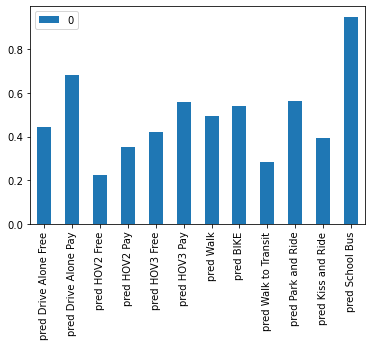

In [150]:
accuracy_df.plot(kind='bar')

(array([2., 1., 2., 2., 3., 0., 1., 0., 0., 1.]),
 array([0.22259577, 0.29537866, 0.36816155, 0.44094444, 0.51372733,
        0.58651022, 0.65929312, 0.73207601, 0.8048589 , 0.87764179,
        0.95042468]),
 <BarContainer object of 10 artists>)

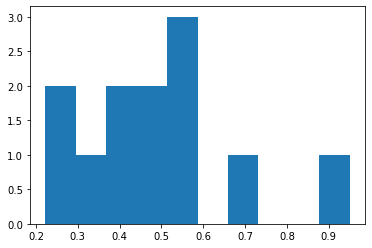

In [151]:
plt.hist(normalized_matrix.diagonal()/normalized_matrix.sum(axis=1))

In [156]:
# try to divide model by the income groups

In [157]:
middle_list = [x==3 for x in new_utilityvars['income'].values]

In [158]:
from itertools import compress

In [159]:
y_pred_middle = list(compress(y_pred, middle_list))
y_test_middle = list(compress(y_test, middle_list))

In [160]:
# multilabel confusion matrix for middle income group
metrics.multilabel_confusion_matrix(y_test_middle, y_pred_middle)

array([[[777,  49],
        [ 31,  33]],

       [[779,  33],
        [ 23,  55]],

       [[772,  33],
        [ 65,  20]],

       [[764,  43],
        [ 49,  34]],

       [[767,  43],
        [ 48,  32]],

       [[783,  31],
        [ 35,  41]],

       [[775,  45],
        [ 42,  28]],

       [[801,  24],
        [ 36,  29]],

       [[774,  38],
        [ 55,  23]],

       [[767,  54],
        [ 33,  36]],

       [[786,  44],
        [ 37,  23]],

       [[783,  25],
        [  8,  74]]])

In [161]:
# 13*13 confusion matrix
matrix_0 = metrics.confusion_matrix(y_test_middle, y_pred_middle)
matrix_0

array([[33,  2,  6,  0,  4,  0,  2,  3,  3,  8,  3,  0],
       [ 1, 55,  0, 19,  0,  3,  0,  0,  0,  0,  0,  0],
       [14,  0, 20,  1, 19,  0,  6,  2,  6,  0,  9,  8],
       [ 1, 23,  0, 34,  0, 23,  1,  0,  1,  0,  0,  0],
       [ 4,  0, 11,  1, 32,  2, 12,  2,  3,  2,  7,  4],
       [ 2,  6,  1, 19,  1, 41,  1,  0,  0,  2,  2,  1],
       [ 6,  0,  6,  1,  9,  0, 28,  5,  8,  0,  1,  6],
       [ 5,  1,  3,  0,  3,  0,  8, 29,  9,  4,  1,  2],
       [ 9,  0,  3,  0,  3,  1, 10,  3, 23, 17,  7,  2],
       [ 7,  1,  1,  1,  0,  1,  2,  4,  3, 36, 13,  0],
       [ 0,  0,  1,  1,  4,  1,  2,  1,  4, 21, 23,  2],
       [ 0,  0,  1,  0,  0,  0,  1,  4,  1,  0,  1, 74]])

In [162]:
normalized_matrix_middle = metrics.confusion_matrix(y_test_middle, y_pred_middle)/ metrics.confusion_matrix(y_test_middle, y_pred_middle).astype(np.float).sum(axis=1)
normalized_matrix_middle

array([[0.515625  , 0.02564103, 0.07058824, 0.        , 0.05      ,
        0.        , 0.02857143, 0.04615385, 0.03846154, 0.11594203,
        0.05      , 0.        ],
       [0.015625  , 0.70512821, 0.        , 0.22891566, 0.        ,
        0.03947368, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.21875   , 0.        , 0.23529412, 0.01204819, 0.2375    ,
        0.        , 0.08571429, 0.03076923, 0.07692308, 0.        ,
        0.15      , 0.09756098],
       [0.015625  , 0.29487179, 0.        , 0.40963855, 0.        ,
        0.30263158, 0.01428571, 0.        , 0.01282051, 0.        ,
        0.        , 0.        ],
       [0.0625    , 0.        , 0.12941176, 0.01204819, 0.4       ,
        0.02631579, 0.17142857, 0.03076923, 0.03846154, 0.02898551,
        0.11666667, 0.04878049],
       [0.03125   , 0.07692308, 0.01176471, 0.22891566, 0.0125    ,
        0.53947368, 0.01428571, 0.        , 0.        , 0.02898551,
        0.03333333,

In [163]:
normalizeddf_middle = pd.DataFrame(
    metrics.confusion_matrix(y_test_middle, y_pred_middle)/ metrics.confusion_matrix(y_test_middle, y_pred_middle).astype(np.float).sum(axis=1))

In [164]:
normalizeddf_middle.columns = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']
normalizeddf_middle.index = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']

In [165]:
normalizeddf_middle

,pred Drive Alone Free,pred Drive Alone Pay,pred HOV2 Free,pred HOV2 Pay,pred HOV3 Free,pred HOV3 Pay,pred Walk,pred BIKE,pred Walk to Transit,pred Park and Ride,pred Kiss and Ride,pred School Bus
pred Drive Alone Free,0.515625,0.025641,0.070588,0.000000,0.0500,0.000000,0.028571,0.046154,0.038462,0.115942,0.050000,0.000000
pred Drive Alone Pay,0.015625,0.705128,0.000000,0.228916,0.0000,0.039474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pred HOV2 Free,0.218750,0.000000,0.235294,0.012048,0.2375,0.000000,0.085714,0.030769,0.076923,0.000000,0.150000,0.097561
pred HOV2 Pay,0.015625,0.294872,0.000000,0.409639,0.0000,0.302632,0.014286,0.000000,0.012821,0.000000,0.000000,0.000000
pred HOV3 Free,0.062500,0.000000,0.129412,0.012048,0.4000,0.026316,0.171429,0.030769,0.038462,0.028986,0.116667,0.048780
pred HOV3 Pay,0.031250,0.076923,0.011765,0.228916,0.0125,0.539474,0.014286,0.000000,0.000000,0.028986,0.033333,0.012195
pred Walk,0.093750,0.000000,0.070588,0.012048,0.1125,0.000000,0.400000,0.076923,0.102564,0.000000,0.016667,0.073171
pred BIKE,0.078125,0.012821,0.035294,0.000000,0.0375,0.000000,0.114286,0.446154,0.115385,0.057971,0.016667,0.024390
pred Walk to Transit,0.140625,0.000000,0.035294,0.000000,0.0375,0.013158,0.142857,0.046154,0.294872,0.246377,0.116667,0.024390
pred Park and Ride,0.109375,0.012821,0.011765,0.012048,0.0000,0.013158,0.028571,0.061538,0.038462,0.521739,0.216667,0.000000


In [169]:
accuracy_df_middle = pd.DataFrame(normalized_matrix_middle.diagonal()/normalized_matrix_middle.sum(axis=1))

In [170]:
accuracy_df_middle.index = travel_names

<AxesSubplot:>

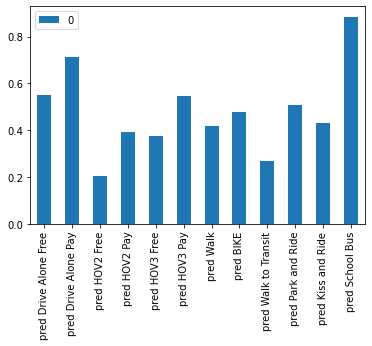

In [171]:
accuracy_df_middle.plot(kind='bar')

In [175]:
low_list = [x==1 or x==2 for x in new_utilityvars['income'].values]

In [176]:
y_pred_low = list(compress(y_pred, low_list))
y_test_low = list(compress(y_test, low_list))

In [177]:
metrics.multilabel_confusion_matrix(y_test_low, y_pred_low)

array([[[892,  64],
        [ 44,  31]],

       [[923,  29],
        [ 27,  52]],

       [[888,  47],
        [ 76,  20]],

       [[913,  31],
        [ 61,  26]],

       [[890,  52],
        [ 52,  37]],

       [[900,  47],
        [ 27,  57]],

       [[889,  50],
        [ 47,  45]],

       [[911,  34],
        [ 36,  50]],

       [[896,  43],
        [ 72,  20]],

       [[891,  55],
        [ 30,  55]],

       [[896,  49],
        [ 51,  35]],

       [[926,  25],
        [  3,  77]]])

In [178]:
# 13*13 confusion matrix
matrix_0 = metrics.confusion_matrix(y_test_low, y_pred_low)
matrix_0

array([[31,  0, 11,  0,  9,  1,  7,  4,  4,  7,  1,  0],
       [ 0, 52,  0, 16,  0, 11,  0,  0,  0,  0,  0,  0],
       [18,  0, 20,  1, 24,  0, 11,  3,  7,  4,  5,  3],
       [ 3, 19,  1, 26,  1, 30,  1,  0,  0,  5,  1,  0],
       [ 8,  1, 20,  0, 37,  0,  5,  1,  4,  2,  7,  4],
       [ 1,  8,  1,  9,  2, 57,  1,  0,  1,  1,  2,  1],
       [ 7,  0,  7,  1,  6,  2, 45, 13,  5,  0,  2,  4],
       [ 9,  0,  2,  1,  1,  0, 12, 50,  4,  2,  2,  3],
       [10,  0,  3,  0,  4,  0, 10,  8, 20, 18, 14,  5],
       [ 3,  1,  0,  0,  1,  1,  3,  3,  6, 55, 12,  0],
       [ 5,  0,  2,  3,  4,  2,  0,  2, 12, 16, 35,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3, 77]])

In [179]:
normalized_matrix_low = metrics.confusion_matrix(y_test_low, y_pred_low)/ metrics.confusion_matrix(y_test_low, y_pred_low).astype(np.float).sum(axis=1)
normalized_matrix_low

array([[0.41333333, 0.        , 0.11458333, 0.        , 0.1011236 ,
        0.01190476, 0.07608696, 0.04651163, 0.04347826, 0.08235294,
        0.01162791, 0.        ],
       [0.        , 0.65822785, 0.        , 0.18390805, 0.        ,
        0.13095238, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.24      , 0.        , 0.20833333, 0.01149425, 0.26966292,
        0.        , 0.11956522, 0.03488372, 0.07608696, 0.04705882,
        0.05813953, 0.0375    ],
       [0.04      , 0.24050633, 0.01041667, 0.29885057, 0.01123596,
        0.35714286, 0.01086957, 0.        , 0.        , 0.05882353,
        0.01162791, 0.        ],
       [0.10666667, 0.01265823, 0.20833333, 0.        , 0.41573034,
        0.        , 0.05434783, 0.01162791, 0.04347826, 0.02352941,
        0.08139535, 0.05      ],
       [0.01333333, 0.10126582, 0.01041667, 0.10344828, 0.02247191,
        0.67857143, 0.01086957, 0.        , 0.01086957, 0.01176471,
        0.02325581,

In [180]:
normalizeddf_low = pd.DataFrame(
    metrics.confusion_matrix(y_test_low, y_pred_low)/ metrics.confusion_matrix(y_test_low, y_pred_low).astype(np.float).sum(axis=1))

In [181]:
normalizeddf_low.columns = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']
normalizeddf_low.index = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']

In [182]:
normalizeddf_low

,pred Drive Alone Free,pred Drive Alone Pay,pred HOV2 Free,pred HOV2 Pay,pred HOV3 Free,pred HOV3 Pay,pred Walk,pred BIKE,pred Walk to Transit,pred Park and Ride,pred Kiss and Ride,pred School Bus
pred Drive Alone Free,0.413333,0.000000,0.114583,0.000000,0.101124,0.011905,0.076087,0.046512,0.043478,0.082353,0.011628,0.0000
pred Drive Alone Pay,0.000000,0.658228,0.000000,0.183908,0.000000,0.130952,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
pred HOV2 Free,0.240000,0.000000,0.208333,0.011494,0.269663,0.000000,0.119565,0.034884,0.076087,0.047059,0.058140,0.0375
pred HOV2 Pay,0.040000,0.240506,0.010417,0.298851,0.011236,0.357143,0.010870,0.000000,0.000000,0.058824,0.011628,0.0000
pred HOV3 Free,0.106667,0.012658,0.208333,0.000000,0.415730,0.000000,0.054348,0.011628,0.043478,0.023529,0.081395,0.0500
pred HOV3 Pay,0.013333,0.101266,0.010417,0.103448,0.022472,0.678571,0.010870,0.000000,0.010870,0.011765,0.023256,0.0125
pred Walk,0.093333,0.000000,0.072917,0.011494,0.067416,0.023810,0.489130,0.151163,0.054348,0.000000,0.023256,0.0500
pred BIKE,0.120000,0.000000,0.020833,0.011494,0.011236,0.000000,0.130435,0.581395,0.043478,0.023529,0.023256,0.0375
pred Walk to Transit,0.133333,0.000000,0.031250,0.000000,0.044944,0.000000,0.108696,0.093023,0.217391,0.211765,0.162791,0.0625
pred Park and Ride,0.040000,0.012658,0.000000,0.000000,0.011236,0.011905,0.032609,0.034884,0.065217,0.647059,0.139535,0.0000


In [183]:
accuracy_df_low = pd.DataFrame(normalized_matrix_low.diagonal()/normalized_matrix_low.sum(axis=1))
accuracy_df_low.index = travel_names

<AxesSubplot:>

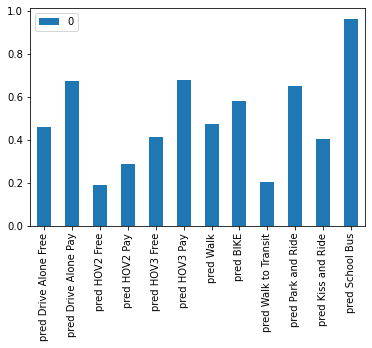

In [184]:
accuracy_df_low.plot(kind='bar')

In [185]:
# for high income
high_list = [x==4 or x==5 for x in new_utilityvars['income'].values]

In [186]:
y_pred_high = list(compress(y_pred, high_list))
y_test_high = list(compress(y_test, high_list))

In [187]:
metrics.multilabel_confusion_matrix(y_test_high, y_pred_high)
# 13*13 confusion matrix
matrix_0 = metrics.confusion_matrix(y_test_high, y_pred_high)
matrix_0

array([[ 82,   0,  19,   2,  16,   0,  17,  17,   7,  23,   8,   0],
       [  2, 103,   0,  32,   1,  15,   0,   0,   1,   3,   0,   0],
       [ 23,   1,  37,   1,  41,   3,  19,   5,   8,   5,   9,   7],
       [  2,  52,   3,  61,   2,  43,   1,   0,   1,   1,   0,   1],
       [  6,   0,  28,   2,  76,   6,  21,   4,   9,   4,   7,   8],
       [  0,  21,   5,  50,   6,  92,   0,   0,   0,   1,   2,   1],
       [  7,   1,  13,   0,   8,   1,  91,  20,  14,   1,   5,   9],
       [ 13,   0,   5,   0,   6,   1,  25,  87,   7,  10,   4,   6],
       [ 15,   1,   9,   0,   5,   0,  17,  10,  56,  33,  17,   8],
       [ 10,   1,   2,   2,   1,   4,   4,  11,  13,  91,  31,   0],
       [ 10,   1,   8,   2,  13,   2,   7,   4,  16,  35,  64,  10],
       [  0,   0,   1,   0,   0,   0,   1,   3,   0,   0,   0, 164]])

In [188]:
normalized_matrix_high = metrics.confusion_matrix(y_test_high, y_pred_high)/ metrics.confusion_matrix(y_test_high, y_pred_high).astype(np.float).sum(axis=1)
normalized_matrix_high

array([[0.42931937, 0.        , 0.11949686, 0.01197605, 0.09356725,
        0.        , 0.1       , 0.10365854, 0.04093567, 0.13529412,
        0.04651163, 0.        ],
       [0.0104712 , 0.65605096, 0.        , 0.19161677, 0.00584795,
        0.08426966, 0.        , 0.        , 0.00584795, 0.01764706,
        0.        , 0.        ],
       [0.12041885, 0.00636943, 0.2327044 , 0.00598802, 0.23976608,
        0.01685393, 0.11176471, 0.0304878 , 0.04678363, 0.02941176,
        0.05232558, 0.04142012],
       [0.0104712 , 0.33121019, 0.01886792, 0.36526946, 0.01169591,
        0.24157303, 0.00588235, 0.        , 0.00584795, 0.00588235,
        0.        , 0.00591716],
       [0.03141361, 0.        , 0.17610063, 0.01197605, 0.44444444,
        0.03370787, 0.12352941, 0.02439024, 0.05263158, 0.02352941,
        0.04069767, 0.04733728],
       [0.        , 0.13375796, 0.03144654, 0.2994012 , 0.03508772,
        0.51685393, 0.        , 0.        , 0.        , 0.00588235,
        0.01162791,

In [189]:
normalizeddf_high = pd.DataFrame(
    metrics.confusion_matrix(y_test_high, y_pred_high)/ metrics.confusion_matrix(y_test_high, y_pred_high).astype(np.float).sum(axis=1))

normalizeddf_high.columns = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']
normalizeddf_high.index = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']

In [190]:
normalizeddf_high

,pred Drive Alone Free,pred Drive Alone Pay,pred HOV2 Free,pred HOV2 Pay,pred HOV3 Free,pred HOV3 Pay,pred Walk,pred BIKE,pred Walk to Transit,pred Park and Ride,pred Kiss and Ride,pred School Bus
pred Drive Alone Free,0.429319,0.000000,0.119497,0.011976,0.093567,0.000000,0.100000,0.103659,0.040936,0.135294,0.046512,0.000000
pred Drive Alone Pay,0.010471,0.656051,0.000000,0.191617,0.005848,0.084270,0.000000,0.000000,0.005848,0.017647,0.000000,0.000000
pred HOV2 Free,0.120419,0.006369,0.232704,0.005988,0.239766,0.016854,0.111765,0.030488,0.046784,0.029412,0.052326,0.041420
pred HOV2 Pay,0.010471,0.331210,0.018868,0.365269,0.011696,0.241573,0.005882,0.000000,0.005848,0.005882,0.000000,0.005917
pred HOV3 Free,0.031414,0.000000,0.176101,0.011976,0.444444,0.033708,0.123529,0.024390,0.052632,0.023529,0.040698,0.047337
pred HOV3 Pay,0.000000,0.133758,0.031447,0.299401,0.035088,0.516854,0.000000,0.000000,0.000000,0.005882,0.011628,0.005917
pred Walk,0.036649,0.006369,0.081761,0.000000,0.046784,0.005618,0.535294,0.121951,0.081871,0.005882,0.029070,0.053254
pred BIKE,0.068063,0.000000,0.031447,0.000000,0.035088,0.005618,0.147059,0.530488,0.040936,0.058824,0.023256,0.035503
pred Walk to Transit,0.078534,0.006369,0.056604,0.000000,0.029240,0.000000,0.100000,0.060976,0.327485,0.194118,0.098837,0.047337
pred Park and Ride,0.052356,0.006369,0.012579,0.011976,0.005848,0.022472,0.023529,0.067073,0.076023,0.535294,0.180233,0.000000


In [191]:
accuracy_df_high = pd.DataFrame(normalized_matrix_high.diagonal()/normalized_matrix_high.sum(axis=1))
accuracy_df_high.index = travel_names

<AxesSubplot:>

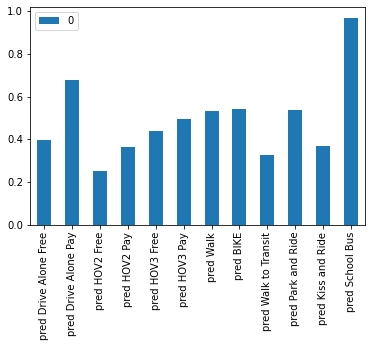

In [192]:
accuracy_df_high.plot(kind='bar')

Comparing the predictions on different income groups, we see that our predictions are slightly better for the higher income groups. For the higher income group, accuracy is higher, and so is sensitivity and precision. It is more noticeable for accuracy. 

For both, sensitivity is higher than precision, which means there is better predictions on the positive class that are correctly predicted, being sligtly better than rate as which precision is correct. 

The predictions individually, by travel modes, we see higher accuracy in predicting Drive Alone Pay and predictions for School Bus. Unfortunately, our predictions for the low income group is not great compared to higher income groups, and so our predictions in general may not be as reliable in representing that group. In terms of how much data we have for each group, the low income group and high income group dataframes have similar amount of rows, above 4,500 rows and under 5,000. Thus, the accuracy has nothing to do with having the data under-represented. 